In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
red_hook = pd.read_csv('LuxDustNoise_summarized_4hour_0719.csv')

sensor_0 : RHI roof (at corner of Hicks and W 9th streets, elevation approx. 8m) - 767 Hicks St, Brooklyn, NY 11231

sensor_3 : RHI entrance (on Hicks street at street level) - 767 Hicks St, Brooklyn, NY 11231

sensor_2 : TechLab (at ground level) - 106 Ferris St

sensor_4 : PioneerWorks roof (elevation approx. 15m) - 159 Pioneer St, Brooklyn, NY 11231

##Attached is the sensor data for luminosity (in Lux), particulate concentration (particle count per 0.01 cubic feet), and noise (sound pressure level in dB)

In [49]:
#lux = lux.rename(columns={'lux':'Luminocity (Lux)','con':'Particulate concentration'})

In [50]:
red_hook.head()

,dt,sensor,lux,con,spl
0,2016-06-21 00:00:00,sensor_0,0.0,2834.03125,66.308479
1,2016-06-21 00:00:00,sensor_2,0.0,1691.99625,70.375943
2,2016-06-21 00:00:00,sensor_3,0.0,1686.44125,76.235738
3,2016-06-21 00:00:00,sensor_4,0.0,2324.65875,70.652334
4,2016-06-21 04:00:00,sensor_0,3213.5,2748.28875,81.467436


In [51]:
col = [u'dt', u'sensor', u'con', u'spl']

In [52]:
red_hook = red_hook[col]

In [7]:
def sensor(sensor):
    sensor = lux[lux.sensor == sensor ]
    sensor.lux.plot(c='red')
    sensor.con.plot(c='yellow')
    sensor.spl.plot()

In [8]:
#day =[]
#hour = []
#for i in red_hook.dt:
    #splited = i.split(' ')
    #day.append(splited[0])
    #hour.append(splited[1])

In [10]:
#red_hook['day'] = day
#red_hook['hour'] = hour

In [21]:
#len(hour)

486

In [53]:
sensor0 = red_hook[red_hook.sensor == 'sensor_0']

In [54]:
sensor0.dt = pd.to_datetime(sensor0.dt)

In [55]:
type(sensor0.dt[0])

pandas.tslib.Timestamp

In [61]:
sensor0.dt = pd.to_datetime(sensor0.dt).apply( lambda x: x.date() )
sensor0.head(10)

,dt,sensor,con,spl
0,2016-06-21,sensor_0,2834.03125,66.308479
4,2016-06-21,sensor_0,2748.28875,81.467436
8,2016-06-21,sensor_0,2720.35125,80.020600
12,2016-06-21,sensor_0,2443.72875,76.525876
16,2016-06-21,sensor_0,2717.49625,80.020600
20,2016-06-21,sensor_0,2839.57500,72.061800
24,2016-06-22,sensor_0,2451.52875,66.308479
28,2016-06-22,sensor_0,2161.75000,69.917600
32,2016-06-22,sensor_0,2714.79750,77.076297
36,2016-06-22,sensor_0,2786.37125,88.647875


In [71]:
sensor00 = sensor0[['dt', 'con']].groupby('dt').sum()

In [74]:
sensor00

,con
dt,
2016-06-21,16303.471250
2016-06-22,15132.481250
2016-06-23,21800.132500
2016-06-24,19625.582500
2016-06-25,16553.111250
2016-06-26,15668.431250
2016-06-27,58672.197500
2016-06-28,25213.595000
2016-06-29,21834.385000


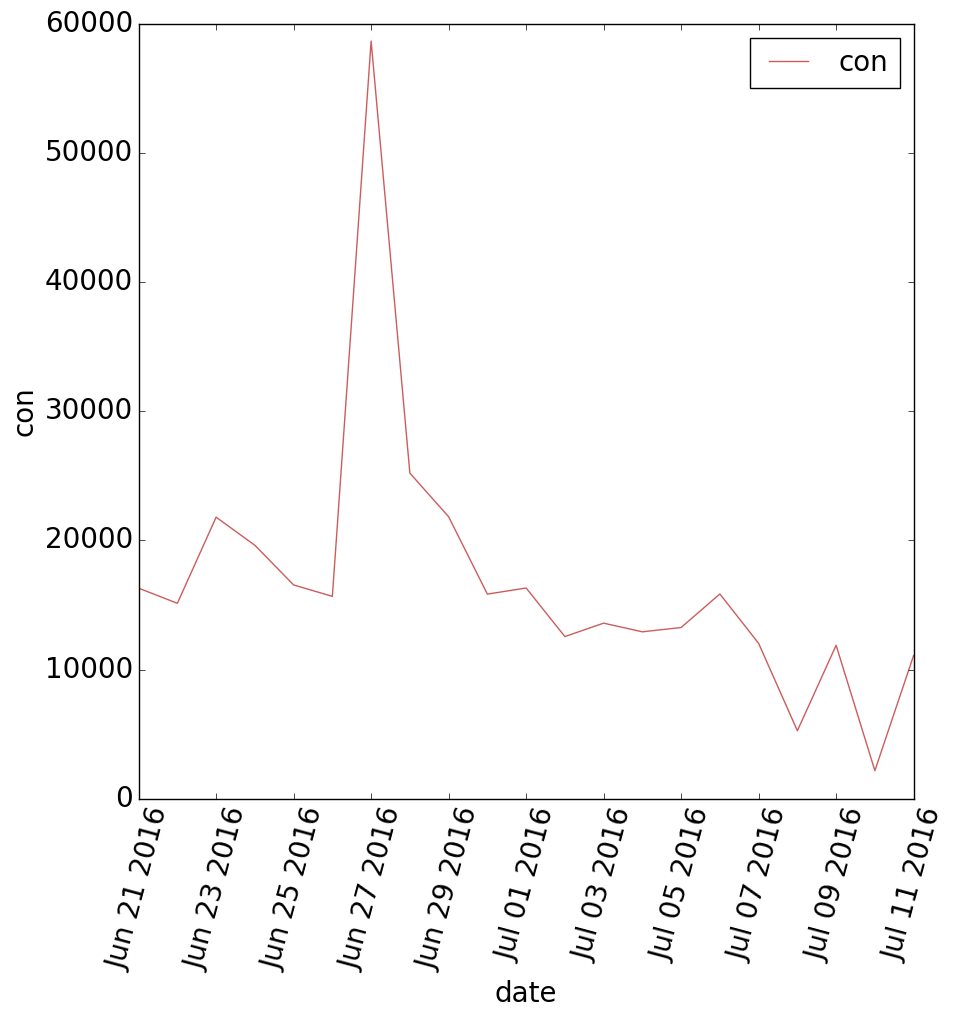

In [73]:
ax = sensor00.plot(figsize=(10,10), color="IndianRed")
plt.xticks(rotation=75, fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-20, plt.ylim()[1])
plt.legend(fontsize=20)
plt.xlabel("date", fontsize=20)
plt.ylabel("con", fontsize=20)

In [77]:
print ("mean con by day {:.2f}".format(sensor00['con'].mean()))
print ("stdev con by day {:.2f}".format(sensor00['con'].std()))
thresholds = [sensor00['con'].mean() + 3 * sensor00['con'].std(), 
              sensor00['con'].mean() - 3 * sensor00['con'].std()]
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds))
print ("earliest datapoint", min(sensor00.index))

mean con by day 16837.32
stdev con by day 10888.68
3-sigma thresholds 49503.36 -15828.73
('earliest datapoint', datetime.date(2016, 6, 21))


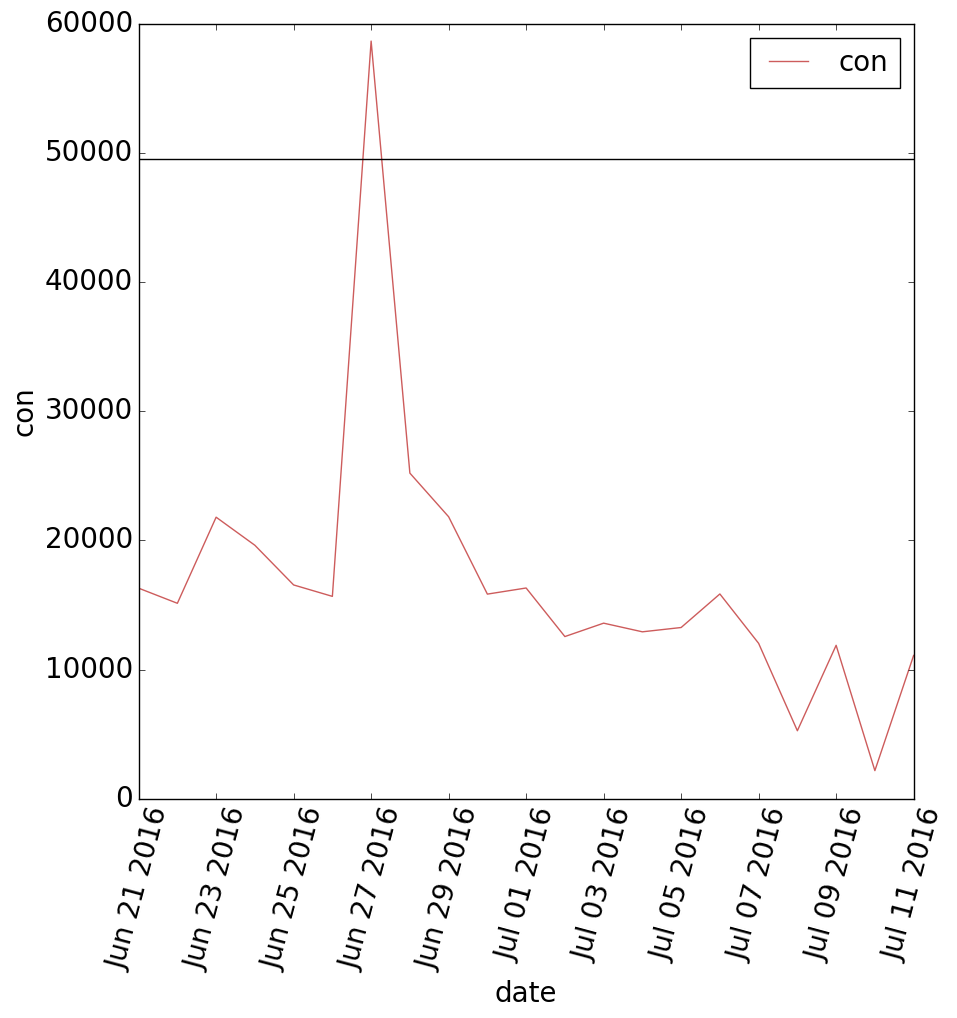

In [78]:
ax = sensor00.plot(figsize=(10,10), color="IndianRed")
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[0], thresholds[0]], color='k')
plt.xticks(rotation=75, fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-20, plt.ylim()[1])
plt.legend(fontsize=20)
plt.xlabel("date", fontsize=20)
plt.ylabel("con", fontsize=20)

In [79]:
sensor00.loc[(sensor00.con > thresholds[0])]

,con
dt,
2016-06-27,58672.1975


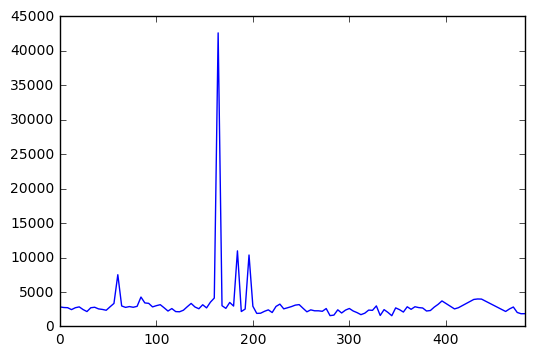

In [37]:
plt.figure()
sensor0.con.plot()

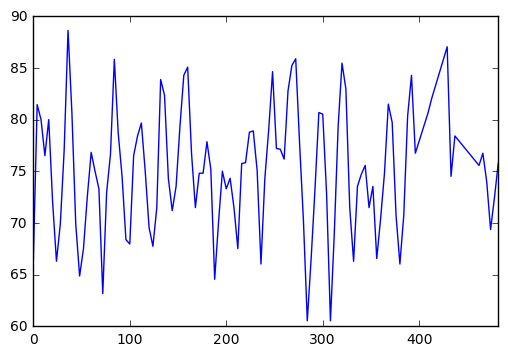

In [15]:
sensor0.spl.plot()

In [16]:
sensor2 = red_hook[red_hook.sensor=='sensor_2']

In [17]:
sensor3 = red_hook[red_hook.sensor=='sensor_3']

In [18]:
sensor4 = red_hook[red_hook.sensor=='sensor_4']

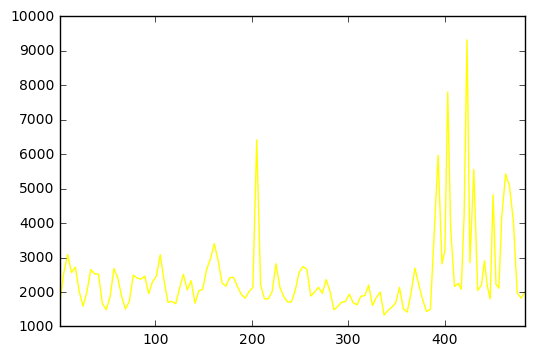

In [19]:
sensor2.con.plot(c='yellow')

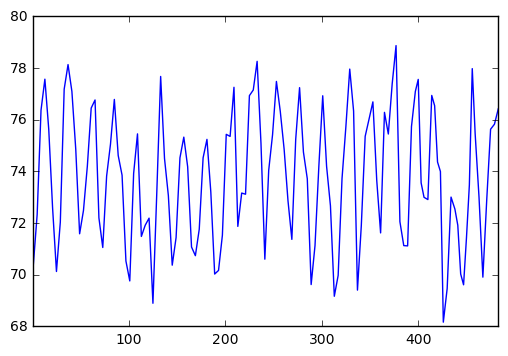

In [20]:
sensor2.spl.plot()

In [ ]:
sensor3.spl.plot()

In [ ]:
sensor3.con.plot(c='yellow')

In [ ]:
sensor4.con.plot(c='yellow')
#sensor4.spl.plot()

In [ ]:
sensor4.spl.plot()